In [102]:
from SparseGrids import *
import SparseGrids as SG
np.version.version

'1.16.2'

# Programming Homework 4

## Problem 1
A beam of radiation that strikes a slab of material will have the intensity decreased by a factor $t = \exp{(-kx)}$ where $x$ is the thickness of the slab and $k$ is the extinction coefficient, sometimes called a macroscopic cross section. If $K \sim \mathcal{N} (\mu = 5, \sigma^2 = 1)$ and $x = 1$, construct a polynomial chaos expansion using Hermite polynomials to represent $t$. Compute the mean and variance of $t$ using the PCE, and compare them with the analytical values obtained in WrittenHW4.

In [168]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.interpolate import lagrange
from numpy.polynomial.hermite_e import hermeval, hermegauss
from numpy.polynomial.legendre import leggauss,legval
from itertools import product
from scipy.special import factorial
from scipy.stats import norm,uniform
import seaborn as sns
from scipy.special import hermite
from numpy.random import multivariate_normal

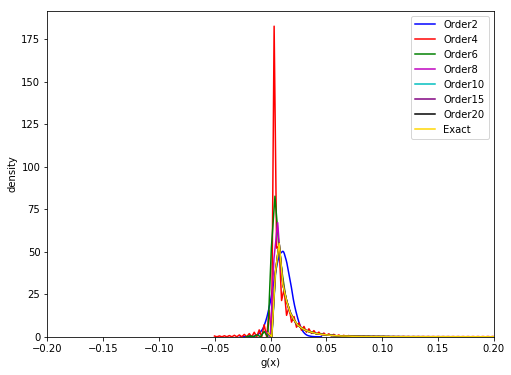

In [10]:
plt.rcParams['figure.figsize'] = (8, 6)
orders = np.array([2,4,6,8,10,15,20])
colors = ['b', 'r', 'g', 'm', 'c', 'purple', 'k', 'gold']
np.random.seed(20)
samples = norm.rvs(size=100000)
for i in range(orders.size):
# interpolation points
    x = hermegauss(orders[i])[0]
# Lagrante interpolation
    lagpoly = lagrange(x, np.exp(-5-x))
# evaluate lagpoly at 10^5 sample points
    y_samples = lagpoly(samples)
# plotting:
    sns.kdeplot(y_samples, color=colors[i], label='Order'+str(orders[i]))
ax = sns.kdeplot(np.exp(-5-samples), color=colors[7], label='Exact')
plt.legend()
plt.xlabel('g(x)')
plt.ylabel('density')
ax.set_xlim([-.2,.2]);

In [16]:
orders = np.array([2,4,6,8,10,15,20])
np.random.seed(50)
samples = norm.rvs(size=100000)
print('{0:4s} {1:12s} {2:12s}'.format('n', 'Mean', 'Variance'))
for i in range(orders.size):
# interpolation points
    x = hermegauss(orders[i])[0]
# Lagrante interpolation
    lagpoly = lagrange(x, np.exp(-5-x))
# evaluate lagpoly at 10^6 sample points
    y_samples = lagpoly(samples)
    print('{0:<4d} {1:<12.8f} {2:<12.8f}'.format(orders[i],y_samples.mean(), y_samples.var()))

n    Mean         Variance    
2    0.01036126   0.00006222  
4    0.01100717   0.00018918  
6    0.01100827   0.00020724  
8    0.01101037   0.00020871  
10   0.01101027   0.00020869  
15   0.01101027   0.00020868  
20   0.01101027   0.00020868  


In [13]:
np.exp(-9/2)

0.011108996538242306

In [15]:
np.exp(-8)-np.exp(-9)

0.0002120528238158323

## Problem 2
The function $f(x)=1/(1+x^2)$ is called the Witch of Agnesi. If $x\sim\mathcal{U}(-2,2)$, find the approximations to the distribution using $10$ function evaluations to build polynomial chaos using stochastic collocation. 

1. Compare the density obtained from the PCE to that obtained from $f(x)$ with $10^5$ samples. 
2. Repeat Part 1 by using $20$ function evaluations to build PCE with stochastic collocation.
3. Repeat Part 1 by using $40$ function evaluations.

What do you find?

In [43]:
x = leggauss(10)[0]
np.random.seed(20)
lagpoly = lagrange(x,1/(1+(2*x)**2))
samples = uniform.rvs(-1,1,size=100000)
nodes = leggauss(10)[0]
weights = leggauss(10)[1]
# Lagrante interpolation
y = lagpoly(nodes)
# evaluate lagpoly at 10^5 sample points
coefs = np.zeros(10)
# plotting:
for i in range(10):
    legpoly_coef = np.zeros(i+1)
    legpoly_coef[-1] = 1
    coefs[i] = np.dot(weights,y*legval(nodes,legpoly_coef)/(2/(2*i+1)))
PCE = legval(samples,coefs)
PCE.var()

0.07003804541031787

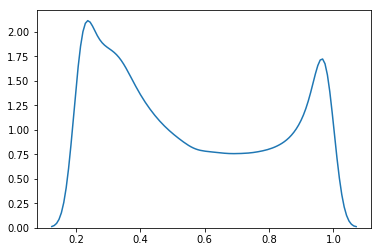

In [44]:
sns.kdeplot(PCE)

In [45]:
x = leggauss(20)[0]
np.random.seed(20)
lagpoly = lagrange(x,1/(1+(2*x)**2))
samples = uniform.rvs(-1,1,size=100000)
nodes = leggauss(10)[0]
weights = leggauss(10)[1]
# Lagrante interpolation
y = lagpoly(nodes)
# evaluate lagpoly at 10^5 sample points
coefs = np.zeros(10)
# plotting:
for i in range(10):
    legpoly_coef = np.zeros(i+1)
    legpoly_coef[-1] = 1
    coefs[i] = np.dot(weights,y*legval(nodes,legpoly_coef)/(2/(2*i+1)))
PCE = legval(samples,coefs)
PCE.var()

0.07005212429843799

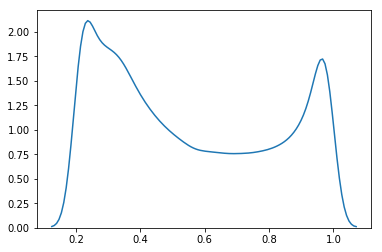

In [46]:
sns.kdeplot(PCE)

In [47]:
x = leggauss(40)[0]
np.random.seed(20)
lagpoly = lagrange(x,1/(1+(2*x)**2))
samples = uniform.rvs(-1,1,size=100000)
nodes = leggauss(10)[0]
weights = leggauss(10)[1]
# Lagrante interpolation
y = lagpoly(nodes)
# evaluate lagpoly at 10^5 sample points
coefs = np.zeros(10)
# plotting:
for i in range(10):
    legpoly_coef = np.zeros(i+1)
    legpoly_coef[-1] = 1
    coefs[i] = np.dot(weights,y*legval(nodes,legpoly_coef)/(2/(2*i+1)))
PCE = legval(samples,coefs)
PCE.var()

3313.8818139305513

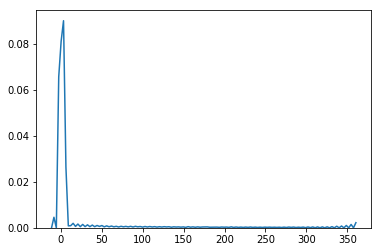

In [48]:
sns.kdeplot(PCE)

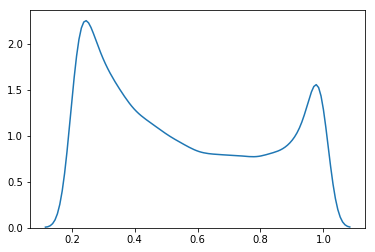

In [53]:
samples = uniform.rvs(-2,2,size=100000)
def f(x):
    return 1/(1+x**2)
sns.kdeplot(f(samples))

## Problem 3
Consider the spring model
\begin{equation}
\begin{aligned}
&m \frac{d^{2} z}{d t^{2}}+c \frac{d z}{d t}+k z=f_{0} \cos \left(\omega_{F} t\right) \\
&z(0)=z_{0}, \frac{d z}{d t}(0)=z_{1}
\end{aligned}
\end{equation}
and steady state response
\begin{equation}
y\left(\omega_{F}, \boldsymbol{\Theta}\right)=\frac{1}{\sqrt{\left(k-m \omega_{F}^{2}\right)^{2}+\left(c \omega_{F}\right)^{2}}}
\end{equation}
where $\boldsymbol{\Theta}=[m,c,k]$. The QoI are the mean and standard deviation for driving frequencies $\omega_F\in[1.3, 2.7]$. Assume that $\boldsymbol{\Theta}\sim\mathcal{N}(\bar{\boldsymbol{\theta}}, V)$ with $\bar{\boldsymbol{\theta}}=[2.7, 0.24, 8.5]$ and $V$ given by
\begin{equation}
V=
\begin{bmatrix}
0.002^2 & 0 & 0 \\
0 & 0.065^2 & 0 \\
0 & 0 & 0.001^2
\end{bmatrix}
\end{equation}
Use the sparse grid techniques to approximate the integrals in the spectral projection. Comparing the resulting QoI given by the PCE with those given by $M=10^5$ Monte Carlo samples. For the sparse grid, using GQN as the node type. These sparse quadrature nodes are generated by the 1D Gaussian-Hermite (probabilist) quadrate nodes, and the weights are divided by $(\sqrt{2\pi})^d$, where $d$ is the number of parameters, to account for the $\frac{1}{\sqrt{2\pi}}$ factor in evaluating integrals with Gaussian weight. Choose polynomial expansion order and sparse grid level so that the PCE results match those from sampling. 

In [50]:
def Z0(theta, omega_F):
    m = theta[0]
    c = theta[1]
    k = theta[2]
    return 1/np.sqrt((k-m*omega_F**2)**2 + (c*omega_F)**2)

In [74]:
theta_mean = np.array([2.7, 0.24, 8.5])
V = np.diag([0.002**2, 0.065**2, 0.001**2])
omega = np.linspace(1.3, 2.7, 100)
nomegaF = omega_Fs.size

In [75]:
def multivariate_pce_tensor_index(d, max_deg):
    maxRange = max_deg*np.ones(d, dtype='int')
    index = np.array([i for i in product(*(range(i+1) for i in maxRange)) if max(i)<=max_deg])
    return index

In [148]:
def response(d, max_deg, level):

    pce_index = multivariate_pce_tensor_index(d, max_deg)
    pce_coef = np.zeros((nomegaF,pce_index.shape[0]))
    #print(pce_index)
    var = np.zeros(nomegaF)
    for_var = np.zeros(nomegaF)
# sparse quadrature where 1D quadrature rules are Gauss-Fejer (SG.FEJ)
    sg = SG.SparseGrid(SG.GQN, d, level, None)
    (x_sg, w_sg) = sg.sparseGrid() # x_sg are in (-1,1)
    #print((x_sg,w_sg))
    n_func_eval = x_sg.shape[0]
    print('Total number of nodes = ', n_func_eval)
    w_sg = w_sg*(np.sqrt(2*np.pi))**3
    for j in range(nomegaF):
        for i in range(pce_index.shape[0]):
            #print(hermite(pce_index[i,0])(x_sg[:,0]))
            pce_coef[j,i] = np.dot(Z0((theta_mean[0] + V[0,0]*x_sg[:,0], theta_mean[1]+V[1,1]*x_sg[:,1],theta_mean[2] + V[2,2]*x_sg[:,2]),omega[j])*hermite(pce_index[i,0])(x_sg[:,0])*hermite(pce_index[i,1])(x_sg[:,1])*hermite(pce_index[i,2])(x_sg[:,2]), w_sg)
            pce_coef[j,i] /= ((np.sqrt(2*np.pi)*factorial(i)))*((np.sqrt(2*np.pi)*factorial(i)))*((np.sqrt(2*np.pi)*factorial(i)))
            if i != 0:
                var[j] += factorial(i)*factorial(i)*factorial(i)*((pce_coef[j,i])**2)
    return pce_coef,var,n_func_eval

In [154]:
pce_coef,var,_ = response(3,3,4)

Total number of nodes =  69


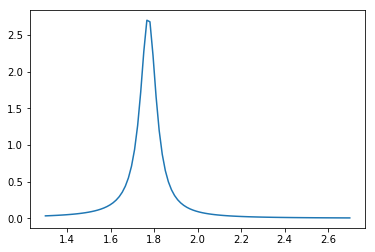

In [155]:
plt.plot(omega,var)

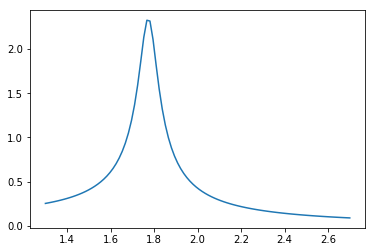

In [160]:
plt.plot(omega,pce_coef[:,0])

In [180]:
samp = multivariate_normal(theta_mean,V,10**5)
samp

array([[2.70063253, 0.15824191, 8.50126733],
       [2.69987961, 0.23029778, 8.50001708],
       [2.70265153, 0.1454649 , 8.49941769],
       ...,
       [2.70311525, 0.31296957, 8.49914726],
       [2.7011061 , 0.15428686, 8.49964622],
       [2.6982931 , 0.10763059, 8.49935428]])

In [183]:
Z0((samp[:,0],samp[:,1],samp[:,2]),omega[1])

array([0.26021386, 0.2597856 , 0.26063447, ..., 0.25954011, 0.26039771,
       0.26027475])

In [190]:
means = np.zeros(nomegaF)
var = np.zeros(nomegaF)
for i in range(nomegaF):
    means[i] = np.mean(Z0((samp[:,0],samp[:,1],samp[:,2]),omega[i]))
    var[i] = (Z0((samp[:,0],samp[:,1],samp[:,2]),omega[i]))
means
var

array([2.41184514e-07, 2.89997865e-07, 3.50540494e-07, 4.26121969e-07,
       5.21135409e-07, 6.41464786e-07, 7.95066468e-07, 9.92809272e-07,
       1.24970302e-06, 1.58671919e-06, 2.03352748e-06, 2.63267186e-06,
       3.44604813e-06, 4.56512934e-06, 6.12741684e-06, 8.34345659e-06,
       1.15422075e-05, 1.62491018e-05, 2.33239696e-05, 3.42119316e-05,
       5.14146176e-05, 7.94069609e-05, 1.26491807e-04, 2.08717286e-04,
       3.58557510e-04, 6.45198757e-04, 1.22481398e-03, 2.47341773e-03,
       5.36286293e-03, 1.26013804e-02, 3.23094605e-02, 9.01876906e-02,
       2.66734310e-01, 7.85253227e-01, 8.49348459e-01, 2.82950757e-01,
       9.55553771e-02, 3.43987919e-02, 1.35415181e-02, 5.83400492e-03,
       2.72908127e-03, 1.37239680e-03, 7.34793608e-04, 4.15304779e-04,
       2.45992694e-04, 1.51765231e-04, 9.70266436e-05, 6.40048504e-05,
       4.34079229e-05, 3.01740219e-05, 2.14426312e-05, 1.55431642e-05,
       1.14706410e-05, 8.60408756e-06, 6.55037000e-06, 5.05502938e-06,
      

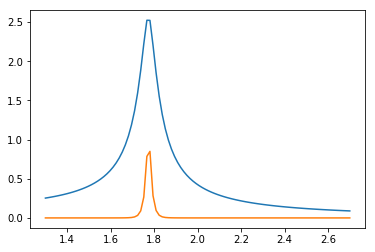

In [192]:
plt.plot(omega,means)
plt.plot(omega,var)